# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Authors:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

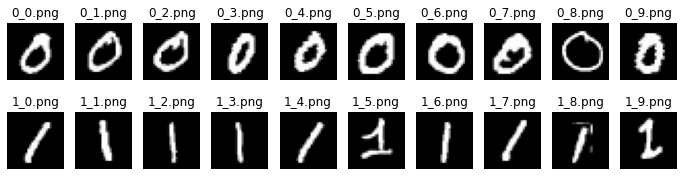

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion

### 1.3 Additional method(s)
#### Principal Component Analysis
PCA allows to extract the eigenvectors for a matrix. We use this tool to find the maximum eigenvector associated to each image. Since we only want two features, we compute the eigenvector for the sum of the zeros and the ones images. And then multiply both these vectors with all images, taking the norm of the result gives us two values that we can plot. Ideally we would like to have two clusters corresponding to the zeros and ones, one in the top left and one in the bottom right corner. This is not exactly what we get but we can still distinguish the two correct clusters.

In [3]:
from sklearn.decomposition import PCA
import numpy as np
from scipy import ndimage as ndi
import cv2
from skimage import feature

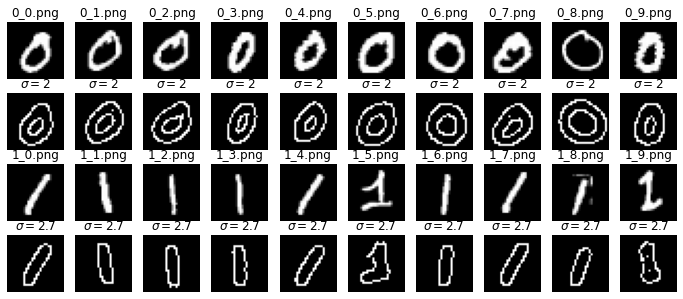

In [4]:
zeros_im_filtres_contours=[]#contours of zeros images
ones_im_filtres_contours=[]#contours of ones images

zeros_im_2 = []
ones_im_2 = []

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(12, 5))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_2.append(edges)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.7)
    ones_im_2.append(edges)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

plt.show()

In [5]:
zeros_im = np.array(zeros_im_2)
ones_im = np.array(ones_im_2)

pca = PCA(n_components=1)
pca.fit(zeros_im.sum(axis=0))
#pca.fit(zeros_im[0])
zeros_sing_vec = pca.components_[0]
pca.fit(ones_im.sum(axis=0))
#pca.fit(ones_im[0])
ones_sing_vec = pca.components_[0]

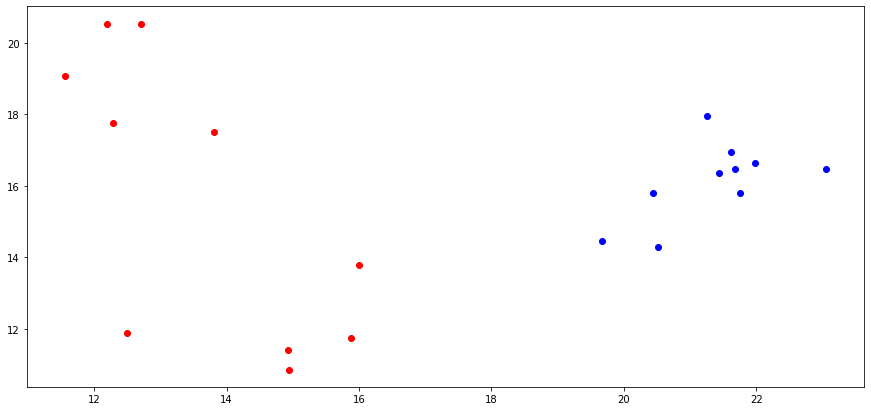

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in range(10):
    ax.scatter(np.matmul(zeros_im[i], zeros_sing_vec).sum(), np.matmul(zeros_im[i], ones_sing_vec).sum(), c='blue')
    ax.scatter(np.matmul(ones_im[i], zeros_sing_vec).sum(), np.matmul(ones_im[i], ones_sing_vec).sum(), c='red')

plt.show()

## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

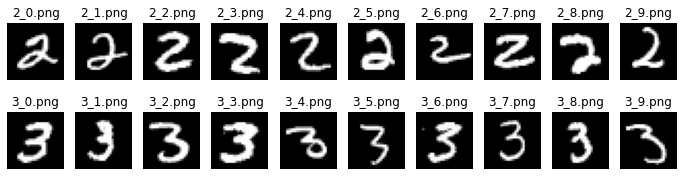

In [7]:
#  Load zeros
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_im = skimage.io.concatenate_images(ic)
#  Load ones
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Additional method(s) and conclusion
In this part, we use around the same method as we did in part 1.2. We compute the first eigenvector for each of the sum of zeros, ones, twos and threes and multiply it with all images. We get a 4-dimension point for each image so we can apply a dimension reduction method like TSNE and then plot the results in 2 dimensions. Unfortunately the 2 and 3s appear in between the zeros and ones and we cannot really distinguish between them. But this also makes a bit of sense since the images can be quite similar.

In [8]:
from sklearn.manifold import TSNE

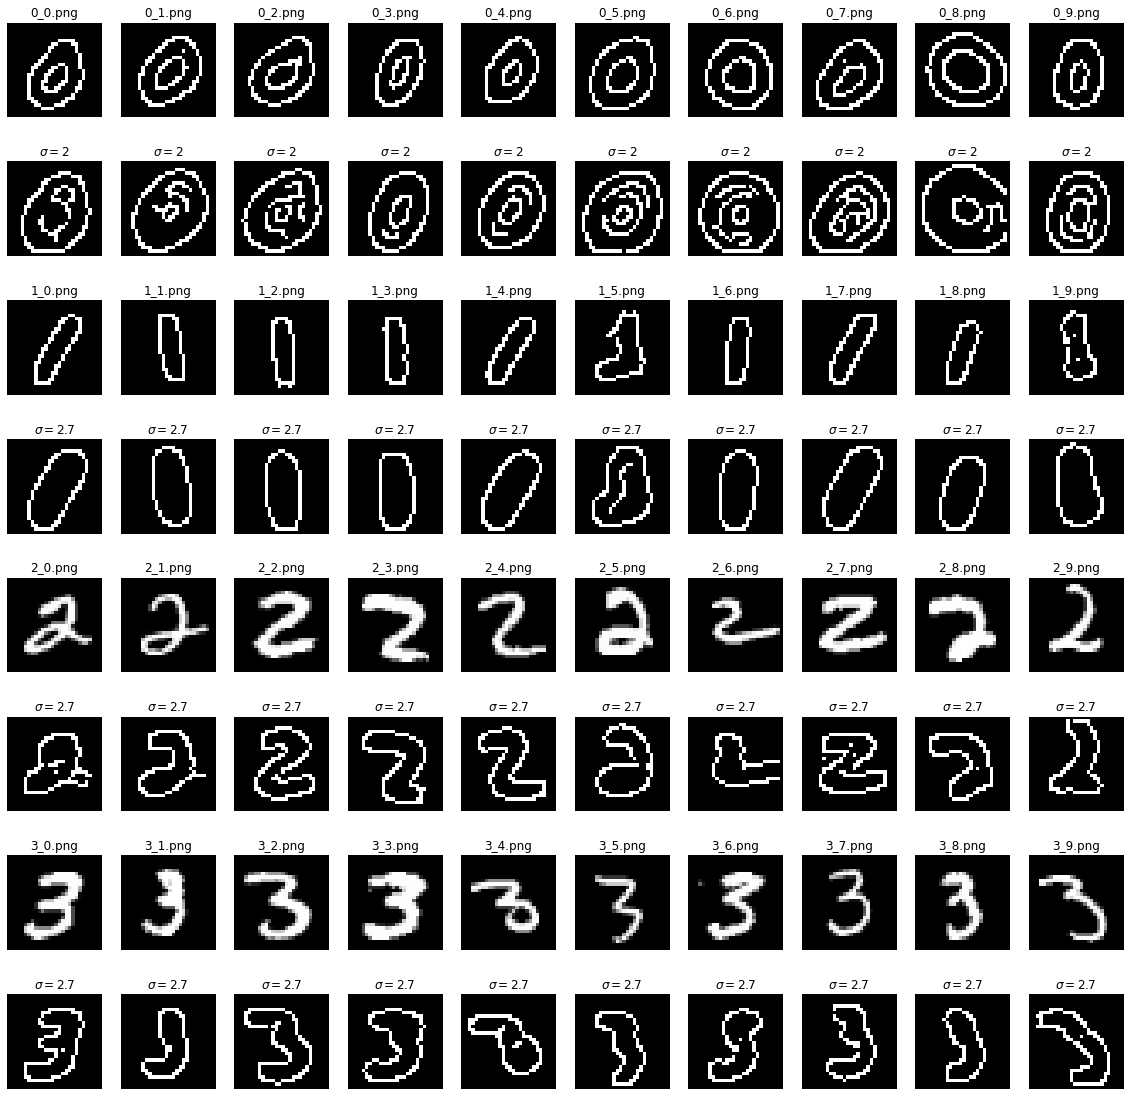

In [9]:
zeros_im_filtres_contours=[] #contours of zeros images
ones_im_filtres_contours=[] #contours of ones images
twos_im_filtres_contours = []
threes_im_filtres_contours = []

zeros_im_2 = []
ones_im_2 = []
twos_im_2 = []
threes_im_2 = []

# Plot images
fig, axes = plt.subplots(8, len(zeros_im), figsize=(20, 20))

for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_2.append(edges)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
    
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    ones_im_2.append(edges)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

    
for ax, im, nm in zip(axes[4], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[5], twos_im, twos_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    twos_im_2.append(edges)
    twos_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')    
    
    
for ax, im, nm in zip(axes[6], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[7], threes_im, threes_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    threes_im_2.append(edges)
    threes_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')    
    
plt.show()

In [10]:
zeros_im = np.array(zeros_im_2)
ones_im = np.array(ones_im_2)
twos_im = np.array(twos_im_2)
threes_im = np.array(threes_im_2)

pca = PCA(n_components=1)
pca.fit(zeros_im.sum(axis=0))
zeros_sing_vec = pca.components_[0]
pca.fit(ones_im.sum(axis=0))
ones_sing_vec = pca.components_[0]
pca.fit(twos_im.sum(axis=0))
twos_sing_vec = pca.components_[0]
pca.fit(threes_im.sum(axis=0))
threes_sing_vec = pca.components_[0]

In [11]:
all_digits = np.concatenate([zeros_im, ones_im, twos_im, threes_im])
coord4 = [[np.matmul(im, zeros_sing_vec).sum(), np.matmul(im, ones_sing_vec).sum(), 
           np.matmul(im, twos_sing_vec).sum(), np.matmul(im, threes_sing_vec).sum()]
         for im in all_digits]

tsne = TSNE(n_components=2, perplexity=10).fit_transform(coord4)
tsne.shape

(40, 2)

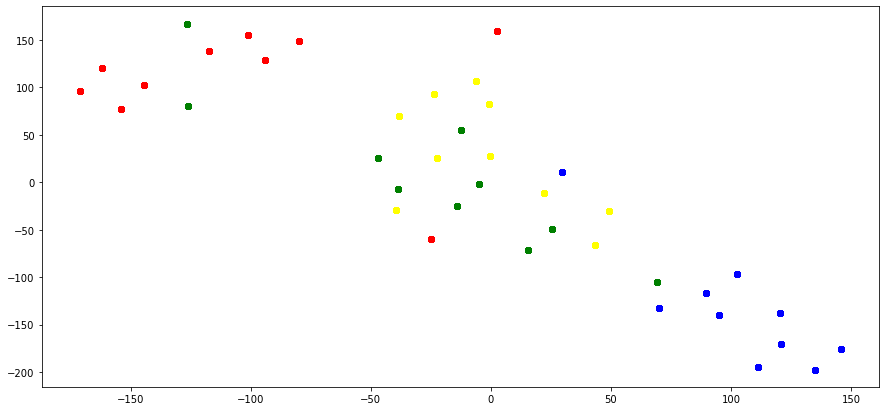

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in range(10):
    ax.scatter(tsne[:10, 0], tsne[:10, 1], c='blue', label='zeros')
    ax.scatter(tsne[10:20, 0], tsne[10:20, 1], c='red', label='ones')
    ax.scatter(tsne[20:30, 0], tsne[20:30, 1], c='green', label='twos')
    ax.scatter(tsne[30:, 0], tsne[30:, 1], c='yellow', label='threes')

plt.show()